# Loan Data from Prosper Exploration - Part 1

## by David Samy Yacoub

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [389]:
# high-level overview of data shape and composition
loan.shape

(113937, 81)

In [390]:
# descriptive statistics for numeric variables
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [391]:
loan.ClosedDate.value_counts()

2014-03-04 00:00:00              105
2014-02-19 00:00:00              100
2014-02-11 00:00:00               92
2012-10-30 00:00:00               81
2013-02-26 00:00:00               78
                                ... 
2006-12-06 00:00:00                1
2006-03-27 00:00:00                1
2008-04-30 12:35:57.370000000      1
2006-12-24 00:00:00                1
2006-01-09 00:00:00                1
Name: ClosedDate, Length: 2802, dtype: int64

In [392]:
# dataset info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [393]:
# do some cleaning:
# rename column `ListingCategory (numeric)` header to be easy in use (dotted attribute)
loan = loan.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})
#convert ListingCreationDate and ClosedDate to datatime dtype:
loan['ListingCreationDate']= pd.to_datetime(loan['ListingCreationDate'])
loan['ClosedDate']= pd.to_datetime(loan['ClosedDate'])

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will focus on 15 variable

1- `ListingCreationDate`(datetime)	The date the listing was created.

2- `Term` (int64) The length of the loan expressed in months.

3- `LoanStatus` (object)	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

4- `ClosedDate` (ClosedDate)	Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.

5- `BorrowerAPR` (float64) The Borrower's Annual Percentage Rate (APR) for the loan.

6- `BorrowerRate` (float64)	The Borrower's interest rate for this loan. 

7- `ProsperScore` (float64)	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

8- `ListingCategory` (int64)	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

9- `BorrowerState` (object)	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

10- `Occupation` (object)	The Occupation selected by the Borrower at the time they created the listing.

11- `EmploymentStatus` (object)	The employment status of the borrower at the time they posted the listing.

12- `EmploymentStatusDuration` (float64)	The length in months of the employment status at the time the listing was created.

13- `IsBorrowerHomeowner` (bool)	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

14- `StatedMonthlyIncome` (float64)	The monthly income the borrower stated at the time the listing was created.

15- `LoanOriginalAmount` (int64)	The origination amount of the loan.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the $Loan$ $Amount$ in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that $Income$ $Range$ will have the strongest effect on $Loan$ $Amount$:The highest paid, get the higher loan. I also think that the `ProsperScore`, `Occupation` and if the borrower classified as a `homowner`,  will have effects on the $Loan$ $Amount$, high `ProsperScore` with guaranteed career and be a homeowner will qualify him to a high $Loan$ $Amount$

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### I'll start by looking at the distribution of the main variable of interest: LoanOriginalAmount

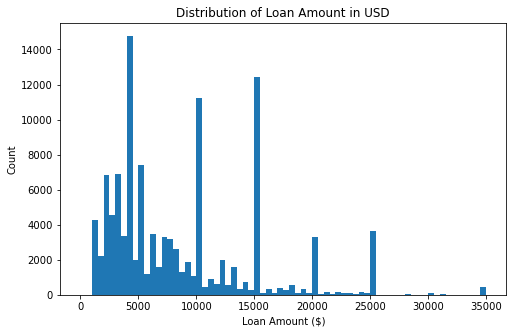

In [3]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount in USD')
plt.show()

Loan amount shape is skewed-right with a peaks at 4000, 10000, 15000, 20000 and 25000 USD

#### Next up, the first predictor variable of interest: monthly income

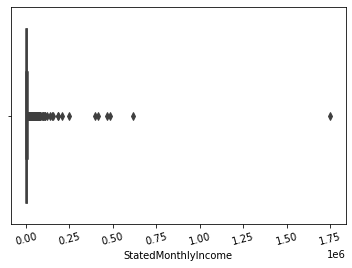

In [4]:
# overview to set plt.axis
sb.boxplot(data=loan, x='StatedMonthlyIncome')
plt.xticks(rotation=15);

In [396]:
loan.StatedMonthlyIncome.max()

1750002.916667

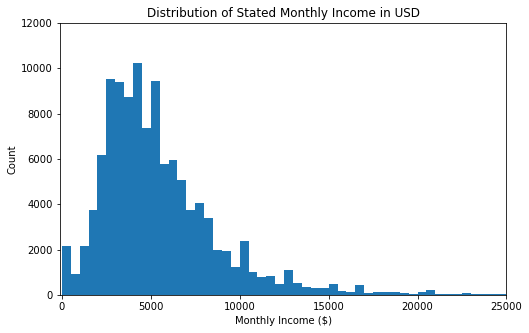

In [397]:
# Stated Monthly Income plot
binsize = 500
bins = np.arange(0, loan['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins)
plt.axis([-100, 25000, 0, 12000])
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income in USD')
plt.show()

Monthly Income has a long tailed distribution with a few borrowers with high income and the peak at 4666 USD monthly, Less than that, approval of the loan will be difficult and as the income increase The need for a loan is decrease

#### now I will take a quick view on `Term` , `IsBorrowerHomeowner`, `Occupation`

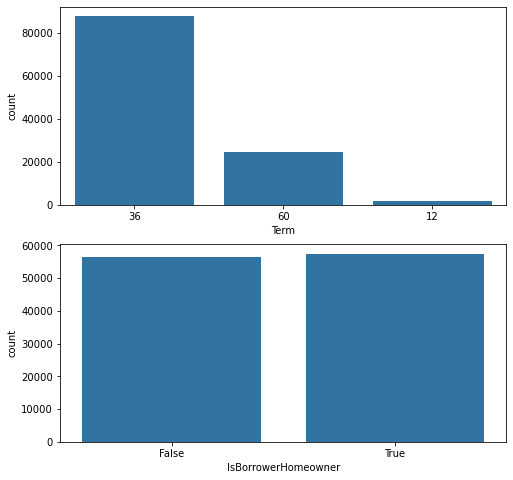

In [398]:
# let's plot Term (The length of the loan expressed in months) and if the borrower is homeowner
type_counts = loan['Term'].value_counts()
type_order = type_counts.index

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'Term', color = default_color,order=type_order, ax = ax[0])
sb.countplot(data = loan, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[1])
plt.show()

there is three terms to pay 1 year and 3 years and 5 years the most prefer to pay Loan installments on 3 years and a few pay within one year

we can see if the borrower own a home or not, have a little influence on the numbers of loans. may be have more effect on the amount of the loan

#### next step, a quick overview of what jobs for borrowers will look like (pie chart)

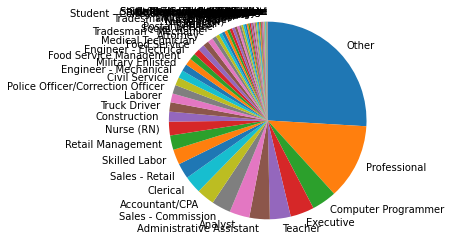

In [5]:
# A quick overview of what jobs for borrowers will look like (pie chart)
sorted_counts = loan['Occupation'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('image');

the most occubation of borrower is Proffessionl then coumputer programer then Executive then teacher an go on as at the chart

#### Next up, the category of the listing that the borrower selected when posting their listing: 

In [400]:
# list the category in order to the most to the lest
type_counts = loan['ListingCategory'].value_counts()
type_order = type_counts.index
# list of the category names with the same order of type_order
tick_names = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement', 'Business','Auto', 'Personal Loan', 'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans', 'Vacation', 'Student Use', 'Motorcycle', 'Engagement Ring', 'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
# category list without order to meet the same order of the names
order2 = loan['ListingCategory'].value_counts(sort=False)
order2 = order2.index

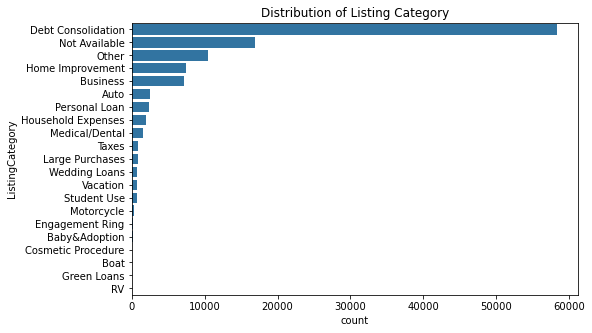

In [401]:
# plot the Distribution of Listing Category
plt.figure(figsize=[8, 5])
sb.countplot(data=loan, y='ListingCategory', color=default_color, order=type_order);
# Change the tick locations and labels
plt.yticks(ticks=order2 ,labels=tick_names)
plt.title('Distribution of Listing Category')
plt.xlabel('count');

we see that the most borrow the loan to consolidation there debit then the most need to improve there homes then busines then to the car and go on.

#### nest step plot the Distribution of loan status

In [402]:
# list the loan status in order to the most to the lest
type_counts = loan['LoanStatus'].value_counts()
type_order = type_counts.index

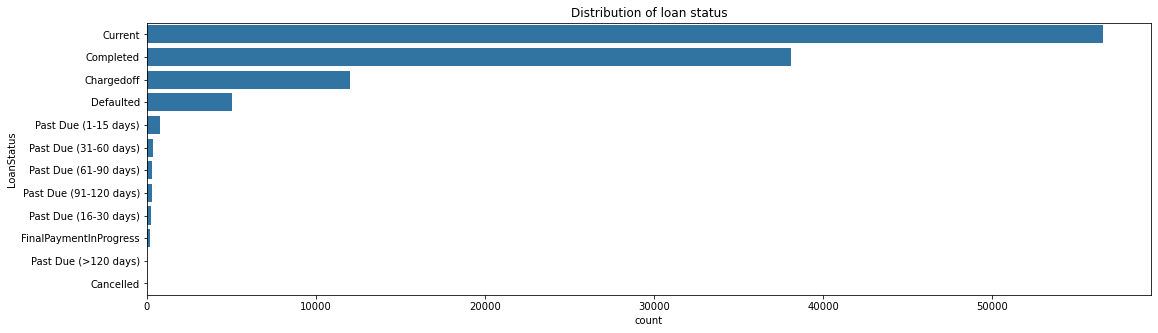

In [403]:
# plot the Distribution of loan status
plt.figure(figsize=[18, 5])
sb.countplot(data=loan, y='LoanStatus', color=default_color, order=type_order);
# Change the tick locations and labels
plt.title('Distribution of loan status')
plt.xlabel('count');

I see that Borrowers are repaying well, not many clients are defaulting and very few loans have been canceled

#### next step is discover the distribution of loan Creation Date

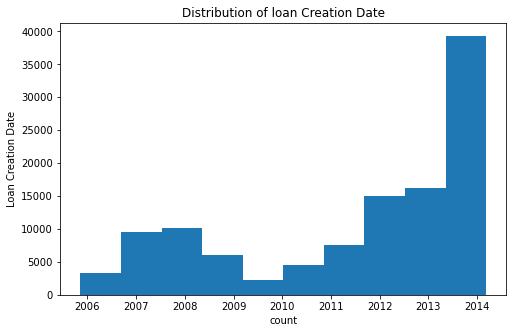

In [404]:
# plot the Distribution of loan Creation Date
plt.figure(figsize=[8, 5])
plt.hist(data=loan, x='ListingCreationDate', color=default_color);
# Change the tick locations and labels
plt.title('Distribution of loan Creation Date')
plt.ylabel('Loan Creation Date')
plt.xlabel('count');

from loan date we can see the work is good start from 2006 then at 2008 because The global economic crisis the loans cound decreased until 2010 then the economy refresed till 2013 and a jump happened with 2014

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan amount shape is skewed-right with a peaks at 4000, 10000, 15000, 20000 and 25000 USD. it's seem normal to me borrower need a specefic amount to use it in one of the category as shown in `Distribution of Listing Category` also we can see The higher the loan amount, the fewer people are eligible for it (or needs the loan)


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I expected more irregularity in payment than this! the Distribution of Listing Category need to explain the labels because it's written with coded numbers. Also there is borrower with monthly income 1,750,000 (I don't expect this is a error because no erros like that in mone and the next income is 6185,47) but No one expects the actions of businessmen.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To start off with, I want to look at the pairwise correlations present between features in the data.

I want to dig into some of the relationships. First, I want to see how loan amount and monthly income are related to one another for the maximun income as 35000

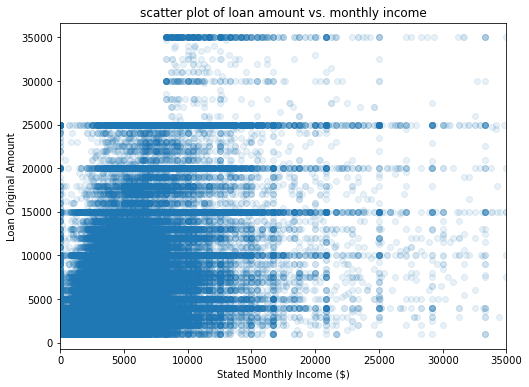

In [6]:
# scatter plot of loan amount vs. monthly income
plt.figure(figsize = [8, 6])
plt.scatter(data = loan, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', alpha = 1/10)
plt.xlim([0, 35000])
plt.ylabel('Loan Original Amount')
plt.xlabel('Stated Monthly Income ($)')
plt.title('scatter plot of loan amount vs. monthly income')
plt.show()

I can see the loan limit is 35000 USD and the loan limit be 25000 USD if the monthly income less than 10000 USD and the shape is random with high density at the smalest values due to who have minimum income take more loans with the minimum amount

#### now let's do the same between loan amount and the term

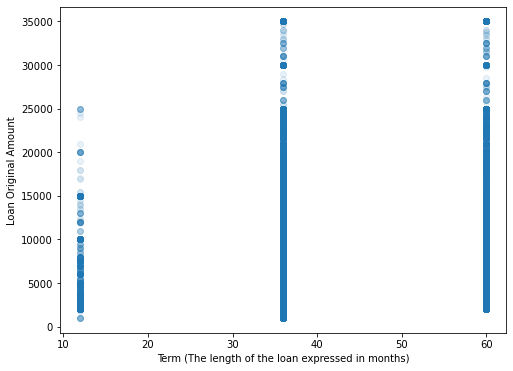

In [406]:
# scatter plot of loan amount vs. Term
plt.figure(figsize = [8, 6])
plt.scatter(data = loan, y = 'LoanOriginalAmount', x = 'Term', alpha = 1/10)
#plt.xlim([0, 35000])
plt.ylabel('Loan Original Amount')
plt.xlabel('Term (The length of the loan expressed in months)')
plt.show()

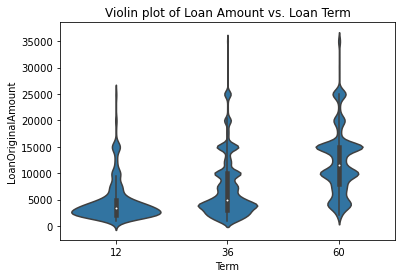

In [407]:
# violin plot of loan amount vs. loan term
plt.title('Violin plot of Loan Amount vs. Loan Term')
sb.violinplot(data = loan, x = 'Term', y = 'LoanOriginalAmount',  color = default_color);

I see most of loans paid within 5 years and the least pay within one year and the maximum loans on one year about 27000 USD and the maximun on 3 and 5 years is 35,000 USD, the most amount paid in one and 3 years is 4000 USD and the most paid in 5 years is 15,000 USD. Contrary to my expectations, there are not a few 4,000 USD loans payable over three years

### next step is to see the relation between loan amount and prosper score

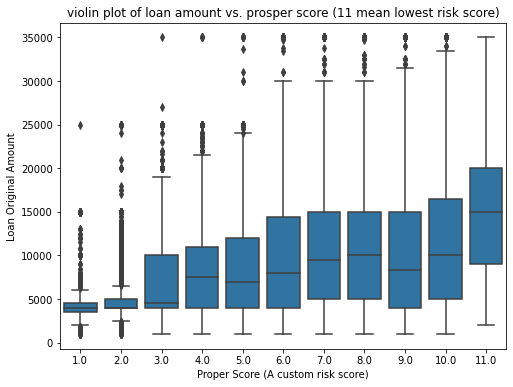

In [408]:
# violin plot of loan amount vs. prosper score
plt.figure(figsize = [8, 6])
sb.boxplot(data = loan, y = 'LoanOriginalAmount', x = 'ProsperScore', color=default_color)
plt.title('violin plot of loan amount vs. prosper score (11 mean lowest risk score)')
plt.ylabel('Loan Original Amount')
plt.xlabel('Proper Score (A custom risk score)')
plt.show()

I can see that the smaller the Proper Score, the smaller the loan amount and peaks at lower amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  There is no clear (linear) relationship between the monthly income and the amount of the loan as I expected because it is clear that loans in the United States are easy to adopt, unlike my place of residence, I can see that who have minimum income take more loans with the minimum amount and. Also the smalest values (low income, small loan) have a high density.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers with lowest score can take a loans yes it's not like high score but also more than my expectation.

>Contrary to my expectations, there are not a few 4,000 USD loans payable over three years

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

The main thing I want to explore next is how the IsBorrowerHomeowner play into the relationship between loan amount and monthly income

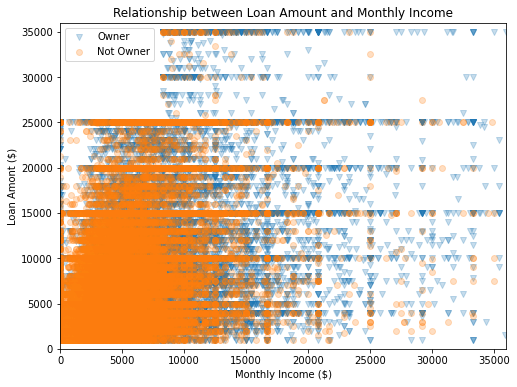

In [409]:

user_type_markers = [[True, 'v'],[False, 'o']]
plt.figure(figsize = [8, 6])
for u_type, marker in user_type_markers:
    bike_u_type = loan[loan['IsBorrowerHomeowner'] == u_type]
    plt.scatter((bike_u_type['StatedMonthlyIncome']), bike_u_type['LoanOriginalAmount'], marker = marker, alpha=0.25)
plt.title('Relationship between Loan Amount and Monthly Income')
plt.legend(['Owner','Not Owner'])
plt.axis([0, 36000, 0, 36000 ])
plt.ylabel('Loan Amont ($)')
plt.xlabel('Monthly Income ($)')
plt.show()

I can see that home ownership gives an opportunity for a bigger loan but less than I expect


#### Now lets see the distribution of the relationship between LoanOriginalAmount and StatedMonthlyIncome with employment statu

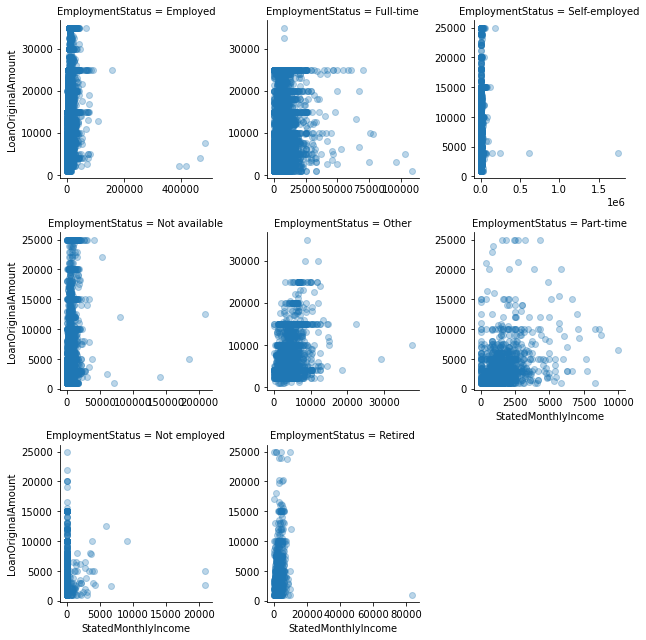

In [410]:
# distribution of the relationship between LoanOriginalAmount and StatedMonthlyIncome with employment status
type_counts = loan['EmploymentStatus'].value_counts()
x_limit = type_counts.index
# Convert the "EmploymentStatus" column from a plain object type into an ordered categorical type
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=x_limit)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(vclasses);
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus', col_wrap=3,sharex=False, sharey=False)
g.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount', alpha=0.3, color=default_color);

employed status can get the hiest loan and full-time status have a 25000 limit with few exeptions

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The borrower owns a home that qualifies him to receive a higher loan. Also employed status can get the hiest loan and full-time status have a 25000 limit with few exeptions and the not employed, retired, part-time, not avalable and self employment status has limit with 25000 USD without exeptions

### Were there any interesting or surprising interactions between features?

> Do not be surprised but I found that home ownership gives an opportunity for a bigger loan but less than I expect